In [1]:
#!/usr/bin/env pyhton3
# -*- coding 

from sklearn import datasets
from sklearn.model_selection import train_test_split
###-----------------
### Import Libraries
###-----------------
import os
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix
import gc

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from utils.helper import fn_plot_tf_hist
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [2]:
# Global variables
#basic hyper parameters
#---------------------------------------------
inpDir = './input' # Input Stored here
outDir = './ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fashion_mnist' # sub dir by dataset

RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000

TEST_SIZE = 0.2 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 50
BATCH_SIZE = 64

PATIENCE = 10
LR_FACTOR = 0.1
LR_PATIENCE = 10

In [3]:
#set the plotting parameters
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
    #'text.usetex':True,

plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


* Define data

In [5]:
start = -2.1
end = 2.1
delta = 0.0005

#Train Data
X_train = np.arange(start, end + delta, delta)
#Noise
y_rnd = np.random.rand(X_train.shape[0]) - 0.5
#signal
y_true = 2 * np.square(X_train) + 2 * np.sin(np.pi * X_train)
#
y_train = y_rnd*2 + y_true

#Test Data
X_test = np.arange(start, end + delta, delta *10)
#Noise
y_rnd = np.random.rand(X_test.shape[0]) - 0.5
#signal
y_true_test = 2 * np.square(X_test) + 2 * np.sin(np.pi * X_test)
#
y_test = y_rnd*2 + y_true_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8401,), (8401,), (841,), (841,))

In [6]:
num_sample = 131*BATCH_SIZE
X_train = X_train[:num_sample]

y_true = y_true[:num_sample]
y_train = y_train[:num_sample]

X_train.shape, y_train.shape, y_true.shape

((8384,), (8384,), (8384,))

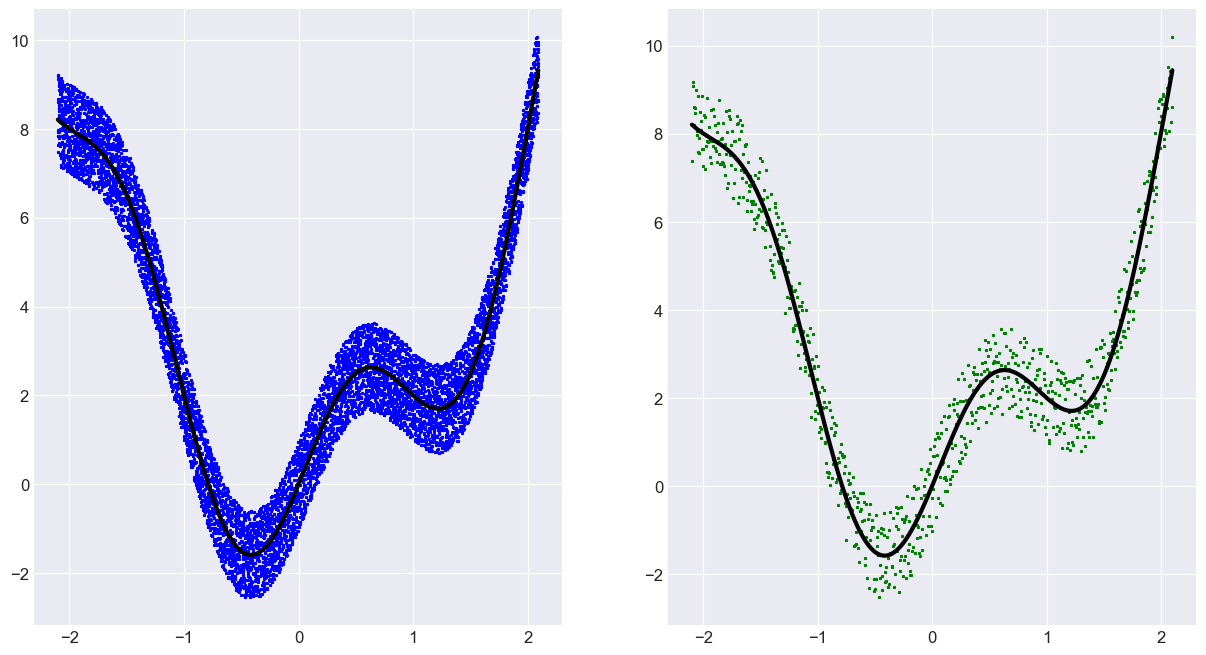

In [7]:
firg, axes = plt.subplots(1,2)
ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize = 2, label = 'Train')
ax.plot(X_train, y_true, c= 'k', linewidth = 3,label = 'True')

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize = 2, label = 'Test')
ax.plot(X_test, y_true_test, c= 'k', linewidth = 3, label = 'True')

In [8]:
inputs = tf.keras.layers.Input(shape=(1,))

x = tf.keras.layers.Dense(128,
                          activation = tf.keras.activations.relu,
                          name = 'fc_1') (inputs)

x = tf.keras.layers.Dense(64,
                          activation = tf.keras.activations.relu,
                          name = 'fc_2') (x)
outputs = tf.keras.layers.Dense(1,
                               name = 'fc_3')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#loss_fn = tf.keras.losses.MeanSquaredError(from_logits = True) # y_test, y_pred shape should be equal
#optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model.compile(optimizer = 'adam', # optimisation, loss calculation 
             loss = 'mean_squared_error',
              metrics = ['mae']
             )
history = model.fit(x = X_train, y = y_train, 
                    validation_data = [X_test, y_test],
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )



Epoch 1/50
131/131 - 2s - 15ms/step - loss: 6.0798 - mae: 1.9038 - val_loss: 2.7288 - val_mae: 1.3641
Epoch 2/50
131/131 - 0s - 2ms/step - loss: 2.0457 - mae: 1.1642 - val_loss: 1.4520 - val_mae: 0.9593
Epoch 3/50
131/131 - 0s - 2ms/step - loss: 1.2888 - mae: 0.8971 - val_loss: 1.1795 - val_mae: 0.8389
Epoch 4/50
131/131 - 0s - 2ms/step - loss: 1.1088 - mae: 0.8219 - val_loss: 1.0585 - val_mae: 0.8026
Epoch 5/50
131/131 - 0s - 2ms/step - loss: 0.9767 - mae: 0.7795 - val_loss: 0.9057 - val_mae: 0.7544
Epoch 6/50
131/131 - 0s - 2ms/step - loss: 0.8226 - mae: 0.7250 - val_loss: 0.7413 - val_mae: 0.6951
Epoch 7/50
131/131 - 0s - 2ms/step - loss: 0.6729 - mae: 0.6629 - val_loss: 0.5967 - val_mae: 0.6352
Epoch 8/50
131/131 - 0s - 2ms/step - loss: 0.5499 - mae: 0.6074 - val_loss: 0.4885 - val_mae: 0.5859
Epoch 9/50
131/131 - 0s - 2ms/step - loss: 0.4654 - mae: 0.5666 - val_loss: 0.4224 - val_mae: 0.5514
Epoch 10/50
131/131 - 0s - 2ms/step - loss: 0.4180 - mae: 0.5425 - val_loss: 0.3895 - val_

In [10]:
loss_df = pd.DataFrame(history.history)
loss_df

,loss,mae,val_loss,val_mae
0,6.079803,1.903844,2.728764,1.364087
1,2.045691,1.164231,1.451959,0.959343
2,1.288784,0.897093,1.179526,0.838945
3,1.108782,0.821886,1.058507,0.802577
4,0.976730,0.779492,0.905743,0.754444
5,0.822647,0.725027,0.741337,0.695065
6,0.672865,0.662905,0.596688,0.635217
7,0.549893,0.607369,0.488545,0.585873
8,0.465407,0.566648,0.422431,0.551428
9,0.417995,0.542528,0.389504,0.532496


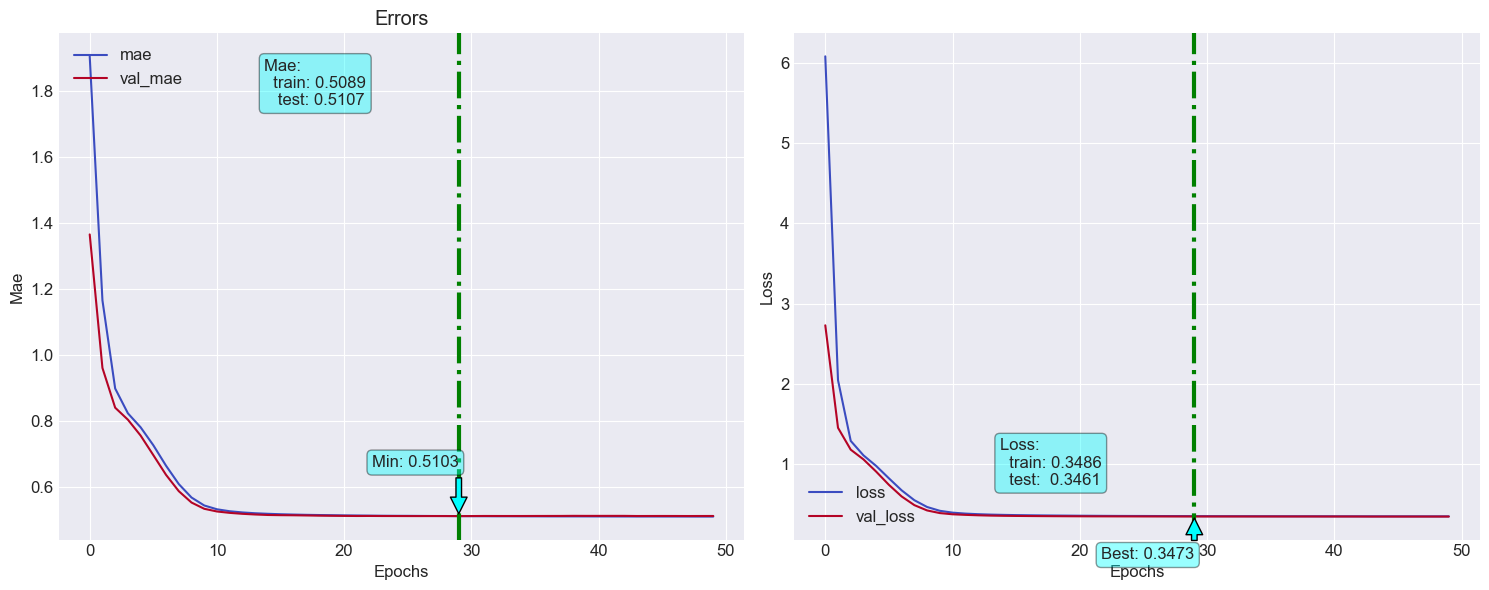

In [11]:
fn_plot_tf_hist(loss_df)

In [12]:
error = model.evaluate(X_test, y_test, verbose = 1)
print(f'Loss:{error[0]:.4f} MAE:{error[1]:.4f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3272 - mae: 0.4935
Loss:0.3461 MAE:0.5107


In [13]:
y_pred = model.predict(X_test)
result_df = pd.DataFrame({'pred': y_pred[:,0], 'test': y_test})
result_df['true'] = y_true_test
result_df.head()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,pred,test,true
0,8.449158,7.383463,8.201966
1,8.435498,9.077535,8.189969
2,8.421837,9.176659,8.178218
3,8.408179,8.200597,8.166704
4,8.394519,8.609283,8.155420


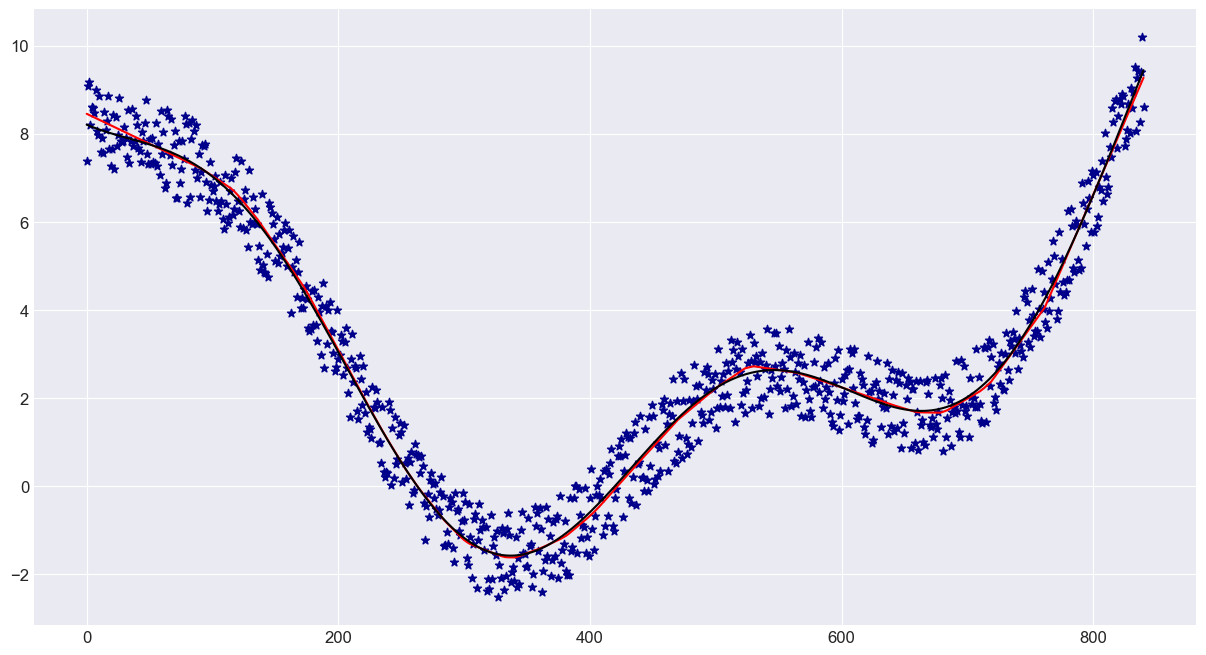

In [33]:
ax = result_df.pred.plot(c = 'r', label = 'pred')
result_df.true.plot(c = 'k', ax=ax, label = 'true')
plt.scatter(result_df.index, result_df.test, marker = '*', c = 'DarkBlue')